# AcadGild_DataScience_Project_2

Problem Statement The ultimate Soccer database for data analysis and machine learning The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.

1. +25,000 matches
2. +10,000 players
3. 11 European Countries with their lead championship
4. Seasons 2008 to 2016
5. Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
6. Team line up with squad formation (X, Y coordinates)
7. Betting odds from up to 10 providers
8. Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.

Object predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

In [2]:
!pip install seaborn

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3  #for database connection and database object access
import seaborn as sns #for graphical representation of data
import math

In [5]:
!pip install statsmodels

In [6]:
import scipy.stats as stats # for Statistiscal analysis
import statsmodels.api as statsmodels # for OLS fitting of data

# sklearn for regression analysis and model evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # for splitting of data inot train and test
from sklearn.metrics import mean_squared_error , r2_score  # for evaluation of model

In [56]:
#loading dataset
Connection = sqlite3.connect('C:/Users/Avinash/Downloads/archive/database.sqlite')
dataset = pd.read_sql_query("SELECT * FROM Player_attributes",Connection)
dataset.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [58]:
#Lets see what are all the columns we have and it can be done in 2 ways
Columns_Soccer = dataset.columns.tolist()
Columns_Soccer

['id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [59]:
#the other way
[(f"column{i+1}: {column}")for i,column in enumerate(dataset.columns)]

['column1: id',
 'column2: player_fifa_api_id',
 'column3: player_api_id',
 'column4: date',
 'column5: overall_rating',
 'column6: potential',
 'column7: preferred_foot',
 'column8: attacking_work_rate',
 'column9: defensive_work_rate',
 'column10: crossing',
 'column11: finishing',
 'column12: heading_accuracy',
 'column13: short_passing',
 'column14: volleys',
 'column15: dribbling',
 'column16: curve',
 'column17: free_kick_accuracy',
 'column18: long_passing',
 'column19: ball_control',
 'column20: acceleration',
 'column21: sprint_speed',
 'column22: agility',
 'column23: reactions',
 'column24: balance',
 'column25: shot_power',
 'column26: jumping',
 'column27: stamina',
 'column28: strength',
 'column29: long_shots',
 'column30: aggression',
 'column31: interceptions',
 'column32: positioning',
 'column33: vision',
 'column34: penalties',
 'column35: marking',
 'column36: standing_tackle',
 'column37: sliding_tackle',
 'column38: gk_diving',
 'column39: gk_handling',
 'column4

In [60]:
#check if the dataset contains any duplicate values
dataset.duplicated().any()

False

#Null row analysis
#here also we can get the data in two ways
# the simplest way is dataset.isna().sum() or dataset.isnull().sum()both gives the same output



In [61]:
# and the otherway is
columns = dataset.columns
percent_missing = (dataset.isnull().sum()/len(dataset))*100
missing_values = pd.DataFrame({'Column_name' : columns,'No. of missing rows':dataset.isnull().sum(),'Total_rows':dataset.count(), 'percent_missing': percent_missing})
missing_values.sort_values('percent_missing')
missing_values


,Column_name,No. of missing rows,Total_rows,percent_missing
id,id,0,183978,0.000000
player_fifa_api_id,player_fifa_api_id,0,183978,0.000000
player_api_id,player_api_id,0,183978,0.000000
date,date,0,183978,0.000000
overall_rating,overall_rating,836,183142,0.454402
potential,potential,836,183142,0.454402
preferred_foot,preferred_foot,836,183142,0.454402
attacking_work_rate,attacking_work_rate,3230,180748,1.755645
defensive_work_rate,defensive_work_rate,836,183142,0.454402
crossing,crossing,836,183142,0.454402


In [62]:
#Taking care of missing data using impuder and other technique
#imputer doesn't wprk for non numeric data so we use the other technique
for col in dataset.select_dtypes(['int64','float64']):
    dataset[col]=dataset[col].fillna((dataset[col].mean()))

In [63]:
columns = dataset.columns
percent_missing = (dataset.isnull().sum()/len(dataset))*100
missing_values = pd.DataFrame({'Column_name' : columns,'No. of missing rows':dataset.isnull().sum(),'Total_rows':dataset.count(), 'percent_missing': percent_missing})
missing_values.sort_values('percent_missing')

,Column_name,No. of missing rows,Total_rows,percent_missing
id,id,0,183978,0.000000
balance,balance,0,183978,0.000000
shot_power,shot_power,0,183978,0.000000
jumping,jumping,0,183978,0.000000
stamina,stamina,0,183978,0.000000
strength,strength,0,183978,0.000000
long_shots,long_shots,0,183978,0.000000
aggression,aggression,0,183978,0.000000
interceptions,interceptions,0,183978,0.000000
positioning,positioning,0,183978,0.000000


In [64]:
#dropping the na values
dataset.dropna(axis=0,inplace=True)

In [65]:
#checking again to see if our code executed correctly 
columns = dataset.columns
percent_missing = (dataset.isnull().sum()/len(dataset))*100
missing_values = pd.DataFrame({'Column_name' : columns,'No. of missing rows':dataset.isnull().sum(),'Total_rows':dataset.count(), 'percent_missing': percent_missing})
missing_values.sort_values('percent_missing')

,Column_name,No. of missing rows,Total_rows,percent_missing
id,id,0,180748,0.0
balance,balance,0,180748,0.0
shot_power,shot_power,0,180748,0.0
jumping,jumping,0,180748,0.0
stamina,stamina,0,180748,0.0
strength,strength,0,180748,0.0
long_shots,long_shots,0,180748,0.0
aggression,aggression,0,180748,0.0
interceptions,interceptions,0,180748,0.0
positioning,positioning,0,180748,0.0


In [66]:
#statistical analysis of data
dataset.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,...,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.00000,180748.000000,180748.000000,180748.000000
mean,92007.255062,166675.834925,137451.730780,68.631166,73.476730,55.134397,49.957178,57.265956,62.482124,49.488883,...,57.868188,54.947972,46.765668,50.360906,48.029282,14.695930,15.96509,20.606978,16.031995,16.342195
std,53096.865278,52961.391212,137527.048463,7.029702,6.583553,17.246558,19.038535,16.478497,14.172483,18.232415,...,15.135884,15.552900,21.224954,21.492330,21.569283,16.842394,15.84191,21.199768,16.070450,17.184708
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,46076.750000,156519.000000,35438.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.00000,8.000000,8.000000,8.000000
50%,92026.500000,183740.000000,80126.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.00000,12.000000,11.000000,11.000000
75%,137966.250000,200111.000000,192771.250000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.00000,15.000000,15.000000,15.000000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.00000,97.000000,96.000000,96.000000


In [67]:
dataset.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [68]:
dataset = dataset.drop(["id","player_fifa_api_id",'player_api_id',"date"],axis = 1)
dataset.head(2)

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [69]:
#again there are 2 ways to get dummies for categorical variable is below and the otherway is by using OneHotencoder and labelencoder
dataset = pd.get_dummies(dataset)
dataset.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
#check if the dummy columns replaced the original columns or do we need them to replace manually
dataset.columns.tolist() #looking at the output these are replaced automatically

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'preferred_foot_left',
 'preferred_foot_right',
 'attacking_work_rate_None',
 'attacking_work_rate_high',
 'attacking_work_rate_le',
 'attacking_work_rate_low',
 'attacking_work_rate_medium',
 'attacking_work_rate_norm',
 'attacking_work_rate_stoc',
 'attacking_work_rate_y',
 'defensive_work_rate_0',
 'defensive_work_rate_1',
 'defensive_work_rate_2',
 'defensive_work_rate_3',
 'defensive_work_rate_4',
 'defensive_work_rate_5',
 'defensive_work_rate_6',
 'def

In [77]:
#Visual analysis, how the dependent variables are distributed
Dataset_Features_X = dataset[dataset.columns[1:]]
Dataset_Features_X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,1,0,0,0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,1,0,0,0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,0,1,0,0,0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,0,0,0,0,0,0,1,0,0,0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
Dataset_Target_y = dataset[dataset.columns[0]]
Dataset_Target_y.head(2)

0    67.0
1    67.0
Name: overall_rating, dtype: float64

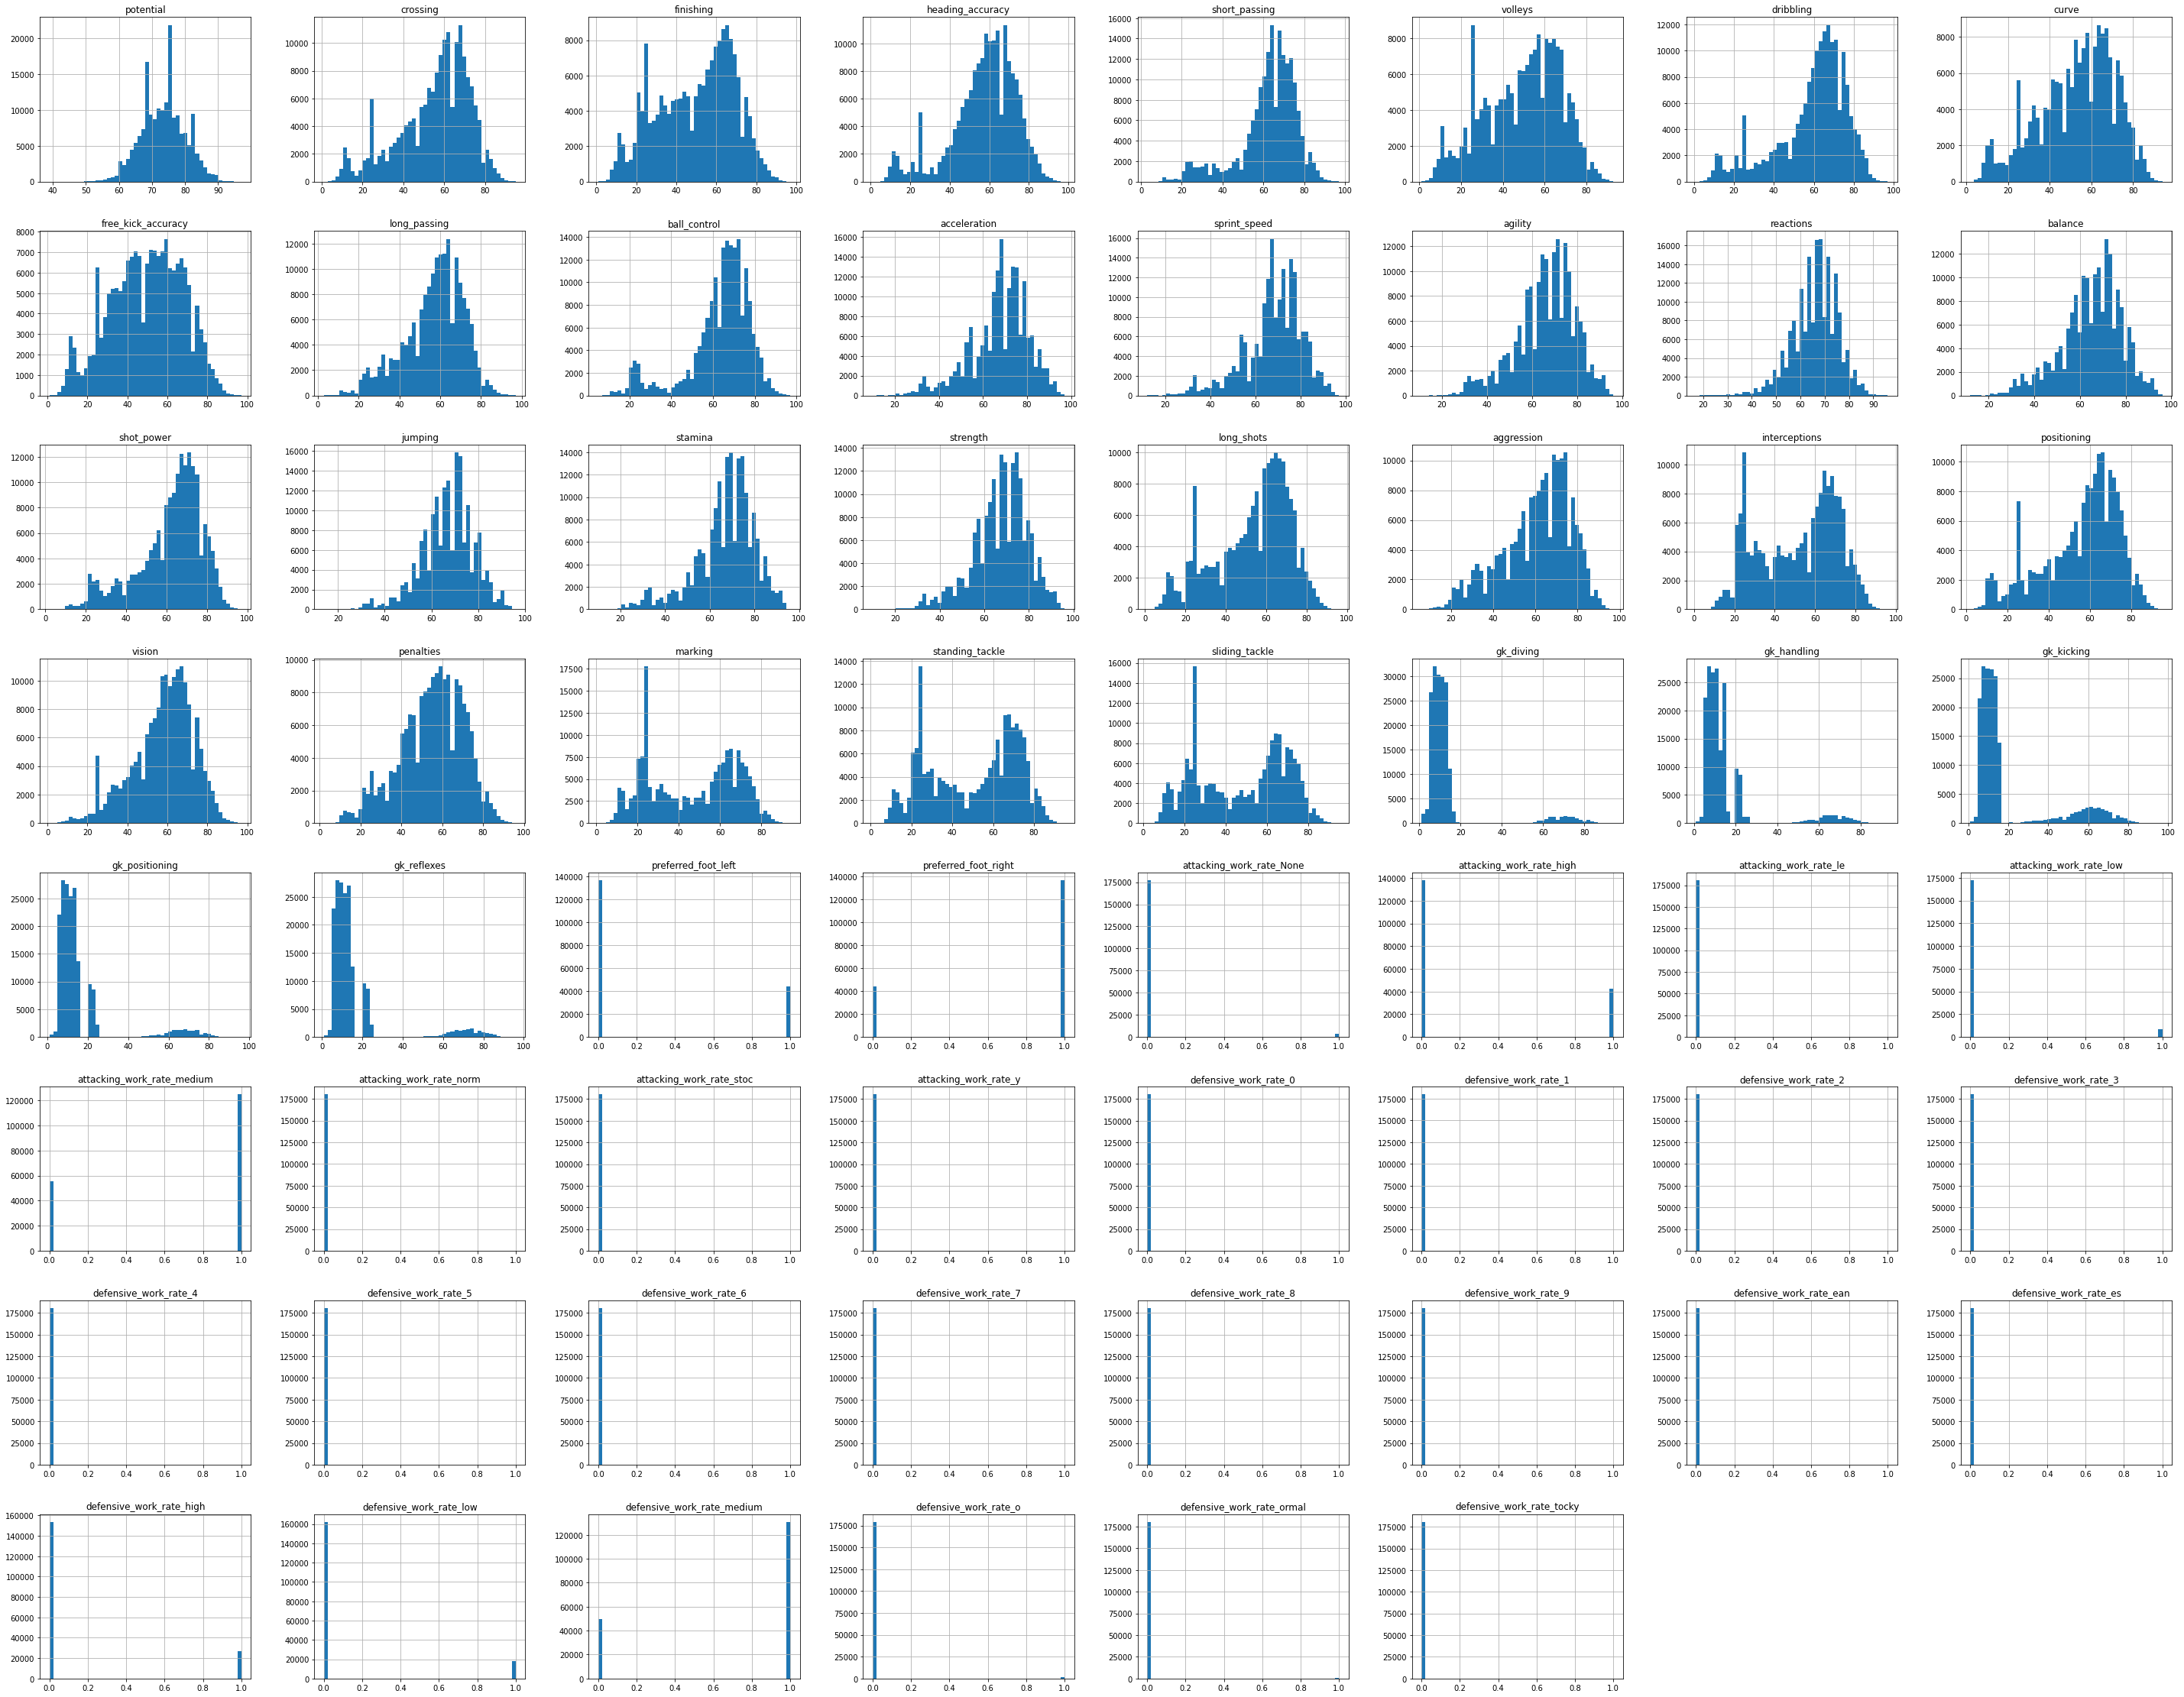

In [80]:
#visual repersentation of features distribution
Dataset_Features_X.hist(bins=50, figsize=(50,40))
plt.show()

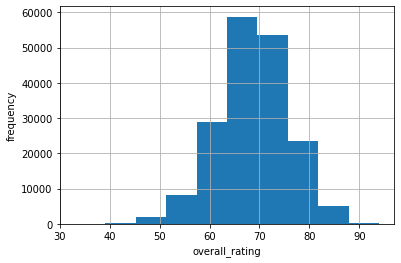

In [84]:
#Visual representation of Target variable distribution
Dataset_Target_y.hist()
plt.xlabel("overall_rating")
plt.ylabel("frequency")
plt.show()

In [91]:
#graphical representation of relationship between overall rating an other independent variable
# To form realtionship between overall fitting and other independemt features , concat the Feature dataframe and target datafrme
df_Basket_Ball=pd.concat([Dataset_Features_X, Dataset_Target_y], axis=1)
df_Basket_Ball.head(2)


,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky,overall_rating
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,1,0,0,0,67.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,1,0,0,0,67.0


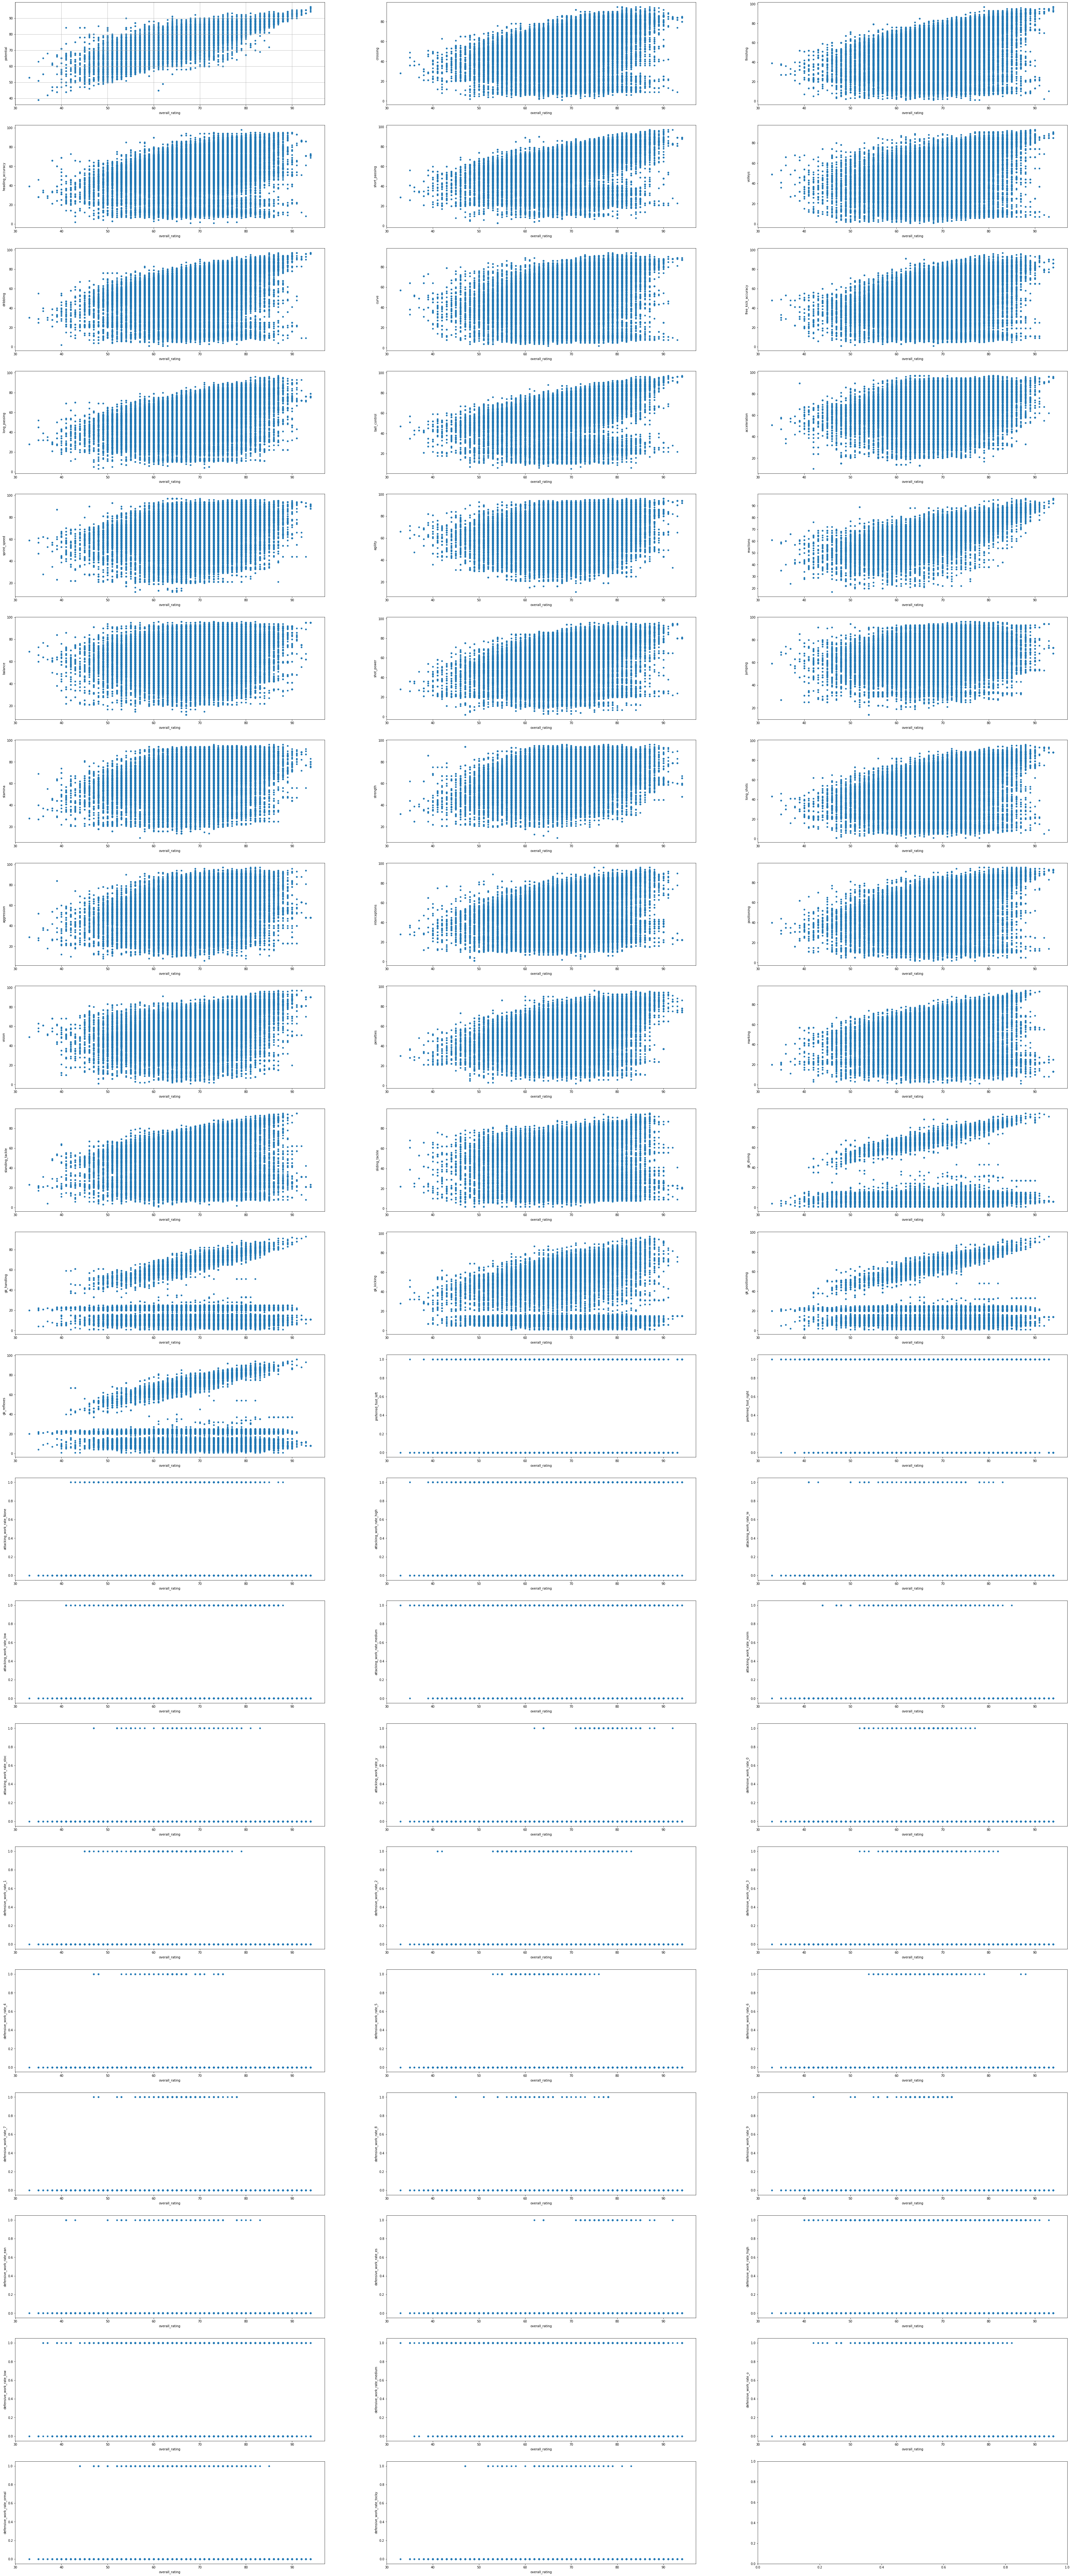

In [92]:
# Visual represenation of overall fitting and other independemt features
fig, axs = plt.subplots(21, 3, sharey=False)
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[0], ax=axs[0][0], figsize=(60, 150), grid=True)
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[1], ax=axs[0][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[2], ax=axs[0][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[3], ax=axs[1][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[4], ax=axs[1][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[5], ax=axs[1][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[6], ax=axs[2][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[7], ax=axs[2][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[8], ax=axs[2][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[9], ax=axs[3][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[10], ax=axs[3][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[11], ax=axs[3][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[12], ax=axs[4][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[13], ax=axs[4][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[14], ax=axs[4][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[15], ax=axs[5][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[16], ax=axs[5][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[17], ax=axs[5][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[18], ax=axs[6][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[19], ax=axs[6][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[20], ax=axs[6][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[21], ax=axs[7][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[22], ax=axs[7][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[23], ax=axs[7][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[24], ax=axs[8][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[25], ax=axs[8][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[26], ax=axs[8][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[27], ax=axs[9][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[28], ax=axs[9][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[29], ax=axs[9][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[30], ax=axs[10][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[31], ax=axs[10][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[32], ax=axs[10][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[33], ax=axs[11][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[34], ax=axs[11][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[35], ax=axs[11][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[36], ax=axs[12][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[37], ax=axs[12][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[38], ax=axs[12][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[39], ax=axs[13][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[40], ax=axs[13][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[41], ax=axs[13][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[42], ax=axs[14][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[43], ax=axs[14][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[44], ax=axs[14][2])
                    

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[45], ax=axs[15][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[46], ax=axs[15][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[47], ax=axs[15][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[48], ax=axs[16][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[49], ax=axs[16][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[50], ax=axs[16][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[51], ax=axs[17][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[52], ax=axs[17][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[53], ax=axs[17][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[54], ax=axs[18][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[55], ax=axs[18][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[56], ax=axs[18][2])
                    
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[57], ax=axs[19][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[58], ax=axs[19][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[59], ax=axs[19][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[60], ax=axs[20][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[61], ax=axs[20][1])
plt.show()

In [112]:
#Splitting the dataset 
X = dataset.iloc[:,1:]
y= dataset.iloc[:,0]

#Training the dataset into linear regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=25, shuffle=True)

In [113]:
# Details of Tarin and test dataset is :
print("The No. of rows in Features Training Dataset(X_train) is : {0}\n , No. of Columns in Features Training Dataset(X_train) is {1}:\
    ".format(X_train.shape[0],X_train.shape[1]),"\n")
print("The No. of rows in Target Training Dataset(y_train) is : {0}".format(y_train.shape[0]),"\n")

print("The No. of rows in Features Test Dataset(X_Test) is : {0}\n , No. of Columns in Features Training Dataset(X_Test) is {1}:\
    ".format(X_test.shape[0],X_test.shape[1]) , "\n")
print("The No. of rows in Target Test Dataset(y_test) is : {0}".format(y_test.shape[0]),"\n")

The No. of rows in Features Training Dataset(X_train) is : 144598
 , No. of Columns in Features Training Dataset(X_train) is 62:     

The No. of rows in Target Training Dataset(y_train) is : 144598 

The No. of rows in Features Test Dataset(X_Test) is : 36150
 , No. of Columns in Features Training Dataset(X_Test) is 62:     

The No. of rows in Target Test Dataset(y_test) is : 36150 



Few definations related to Linear regression model * Coefficient of Determination (R square) : it explains the proportion of variation in the dependent variable that is explained by the independent variables. * Adjusted R square: Another parameter to explains the proportion of variation in the dependent variable based upon addition or removal of independent feature.adjusted R square will always be less than or equal to R square.

In [114]:

# Apply linear regression model between Tagret and and independent features using Training dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [115]:
#predicting values
y_pred_train = regressor.predict(X_train)
y_pred_train

array([64.49353994, 68.67067468, 80.49548172, ..., 61.66408416,
       64.61249761, 73.99405527])

In [116]:
#calculating r square, which helps us to know the percentage of accuracy
regressor_score = regressor.score(X_train,y_train)
print("The Coefficient of determination R^2 (R square) on Training Dataset\score : ",regressor_score,"\n")

The Coefficient of determination R^2 (R square) on Training Dataset\score :  0.8442957482267206 



In [104]:
print(regressor.coef_,"\n")
print("below is the interceptor\n")
print(regressor.intercept_)

[ 0.37590857  0.02352822  0.0118994   0.06917106  0.0515023   0.00303011
 -0.01053841  0.01228709  0.0131038   0.00629256  0.13319372  0.00497553
  0.01076813 -0.00824168  0.20711534  0.00759959  0.01652839  0.01561722
 -0.00343195  0.05922956 -0.01400208  0.01978728  0.01260534 -0.00918106
 -0.00191025  0.01340792  0.03223775  0.00294546 -0.02656932  0.16768396
  0.03396317 -0.03471215  0.05739939  0.02491742 -0.00835401  0.00835401
 -0.24042742  0.18532799 -0.62911831  1.48060356  0.10035472 -0.171479
 -0.72827429  0.00301274 -0.10562098  0.50238917 -0.32860822  0.50663743
 -0.65908604 -0.26716999 -0.11441051  0.61135908  0.93748723  0.4031383
 -0.62911831  0.00301274 -0.07045524  0.32169845 -0.34468704  0.13318723
 -0.171479   -0.72827429] 

below is the interceptor

-3.425052210114245


In [118]:
# Mapping Coeffient values with their features name
df_reg_model_Coef = pd.DataFrame(list(zip(X_train.columns,regressor.coef_)),columns=['Features', 'Estimated coefficients'])
print("The Features with their coeffient values(first 5 rows)  are:")
df_reg_model_Coef.head(5)

The Features with their coeffient values(first 5 rows)  are:


,Features,Estimated coefficients
0,potential,0.375909
1,crossing,0.023528
2,finishing,0.011899
3,heading_accuracy,0.069171
4,short_passing,0.051502


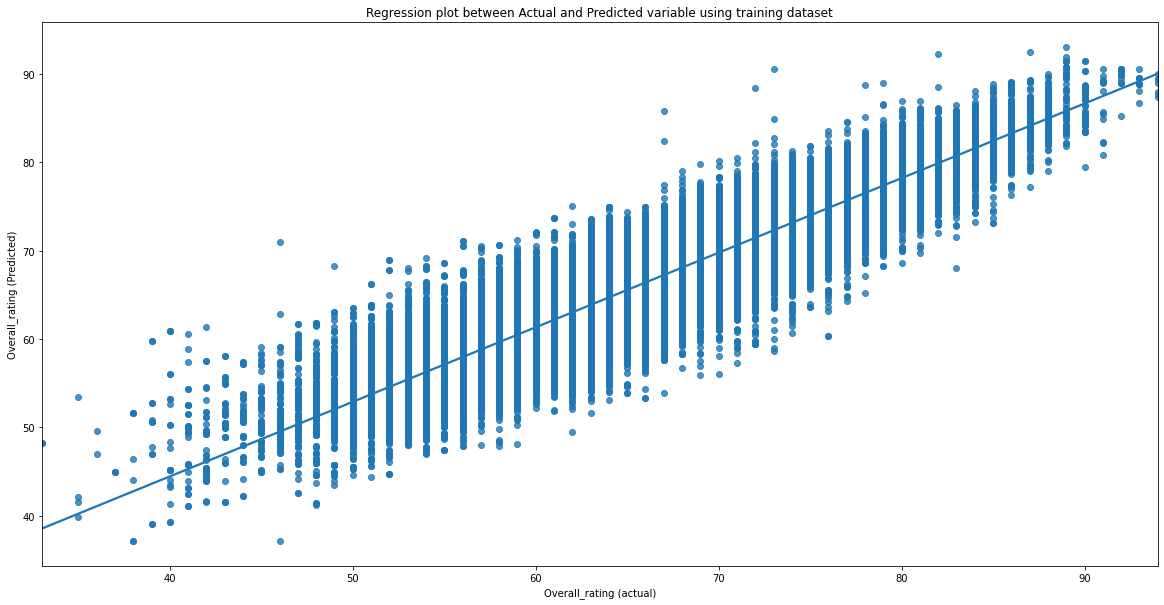

In [119]:
# Scatterplot between Actual Target values ( overall rating ) and Predicted target (predicted overall rating) based on Training dataset
fig =plt.figure( figsize=(20,10))
sns.regplot(x=y_train, y=y_pred_train ,data=X_train) # searborn(sns).regplot for scatter plot between values and applying line of gooness fit
plt.xlabel("Overall_rating (actual)")
plt.ylabel("Overall_rating (Predicted)")
plt.title("Regression plot between Actual and Predicted variable using training dataset")
plt.show()

In [122]:
# Prediction of overall rating based upon Test data set
y_pred_test= regressor.predict(X_test)

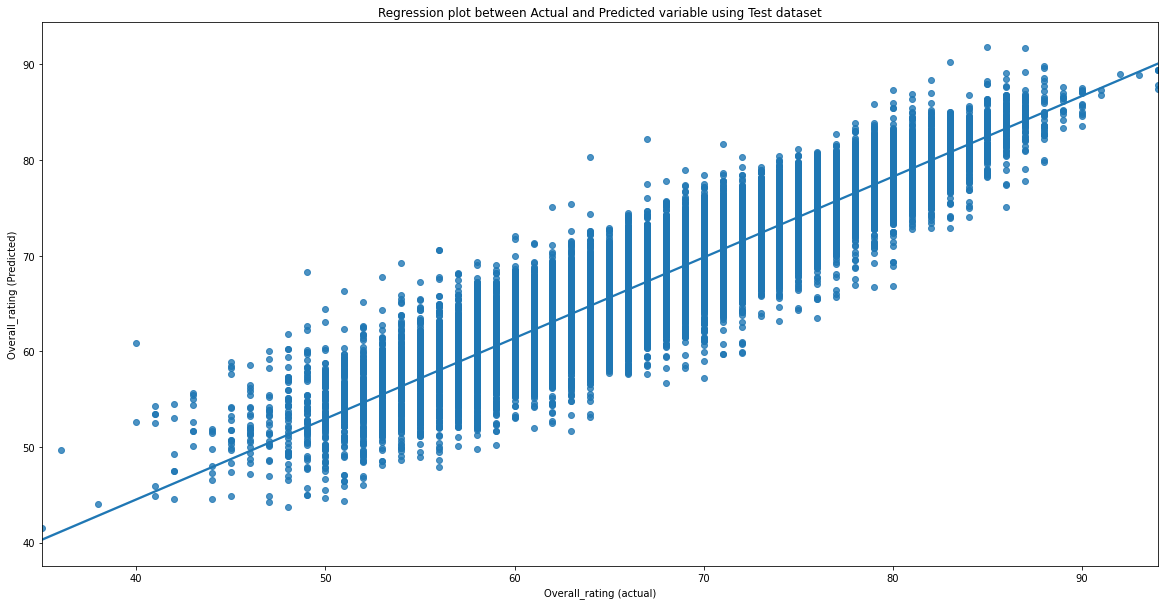

In [123]:
# Scatterplot between Actual Target values ( overall rating ) and Predicted target (predicted overall rating) based on Test dataset

fig =plt.figure( figsize=(20,10))
sns.regplot(x=y_test, y=y_pred_test ,data=X_test) # searborn(sns).regplot for scatter plot between values and applying line of gooness fit
plt.xlabel("Overall_rating (actual)")
plt.ylabel("Overall_rating (Predicted)")
plt.title("Regression plot between Actual and Predicted variable using Test dataset")
plt.show()

In [125]:
#Applying Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10)
print("accuracy: {:.2f} %".format(accuracies.mean()*100))#this is the mean of 10 folds an d for percentage *100
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

accuracy: 84.41 %
Standard deviation: 0.22 %
